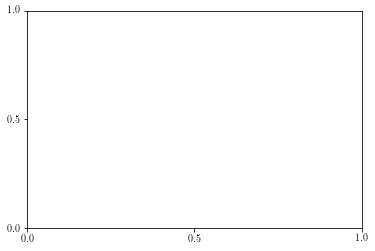

In [22]:
import sys,os
import numpy as np
import lhapdf
import pylab as py
import pandas as pd
from Evolve.kernel_q import kernel_q, alphas
from scipy.integrate import quad,fixed_quad
%matplotlib inline
from  matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib import font_manager
import matplotlib
from matplotlib.pyplot import gca
from matplotlib.ticker import MultipleLocator, FormatStrFormatter,AutoMinorLocator
from scipy.interpolate import interp1d
import random
a = gca()
sizeOfFont = 30
rc('text',usetex=True)
fontProperties = {'family':'Helvetica','weight' : 'normal', 'size' : sizeOfFont}
ticks_font = matplotlib.font_manager.FontProperties(family='Helvetica', style='normal',size=sizeOfFont, weight='normal', stretch='normal')
rc('text',usetex=True)
rc('font',**fontProperties)
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings("ignore")

In [23]:
ffpip=lhapdf.mkPDFs('FDSS_PIP')
def CxFF(z,Q):
    #if Q<1.1:
    #    Q = 1.1
    D = ffpip[0].xfxQ( 1,z,Q)/z
    U = ffpip[0].xfxQ( 2,z,Q)/z
    S = ffpip[0].xfxQ( 3,z,Q)/z
    SB= ffpip[0].xfxQ(-3,z,Q)/z
    UB= ffpip[0].xfxQ(-2,z,Q)/z
    DB= ffpip[0].xfxQ(-1,z,Q)/z
    return 0,D,U,S,SB,UB,DB

In [24]:
pdfp=lhapdf.mkPDFs('CT14TMD')
def CxPDF(x,Q):
    #if Q<1.1:
    #    Q = 1.1
    D = pdfp[0].xfxQ( 1,x,Q)/x
    U = pdfp[0].xfxQ( 2,x,Q)/x
    S = pdfp[0].xfxQ( 3,x,Q)/x
    SB= pdfp[0].xfxQ(-3,x,Q)/x
    UB= pdfp[0].xfxQ(-2,x,Q)/x
    DB= pdfp[0].xfxQ(-1,x,Q)/x
    return 0,D,U,S,SB,UB,DB

In [25]:
def TMDPDF(x,Q,b):
    bmax = 1.5
    bstar = b/np.sqrt(1.+(b/bmax)**2.)
    c0 = 1.122919
    Q0 = c0/bstar
    Revo = kernel_q(bstar,Q0,Q,Q0,Q,3)
    ggi,DDi,UUi,SSi,SBi,UBi,DBi = CxPDF(x,Q0)
    ktw = 0.424
    kappa2 = 0.84
    Qini = np.sqrt(2.4)
    kappa1 = ktw/4.
    FNP = np.exp( -(kappa1)*b*b-kappa2/2.*np.log(b/bstar)*np.log(Q/Qini) )
    DD= DDi*FNP*Revo
    UU= UUi*FNP*Revo
    SS= SSi*FNP*Revo
    SB= SBi*FNP*Revo
    UB= UBi*FNP*Revo
    DB= DBi*FNP*Revo
    return DD,UU,SS,SB,UB,DB

In [26]:
def TMDFF(z,Q,b):
    bmax = 1.5
    bstar = b/np.sqrt(1.+(b/bmax)**2.)
    c0 = 1.122919
    Q0 = c0/bstar
    Revo = kernel_q(bstar,Q0,Q,Q0,Q,3)
    ggi,DDi,UUi,SSi,SBi,UBi,DBi = CxFF(z,Q0)
    ktw = 0.168
    kappa2 = 0.84
    Qini = np.sqrt(2.4)
    kappa1 = ktw/4./z/z
    FNP = np.exp( -(kappa1)*b*b-kappa2/2.*np.log(b/bstar)*np.log(Q/Qini) )
    DD= DDi*FNP*Revo/z/z
    UU= UUi*FNP*Revo/z/z
    SS= SSi*FNP*Revo/z/z
    SB= SBi*FNP*Revo/z/z
    UB= UBi*FNP*Revo/z/z
    DB= DBi*FNP*Revo/z/z
    return DD,UU,SS,SB,UB,DB

# Check against Fig 10 in 1505.05589

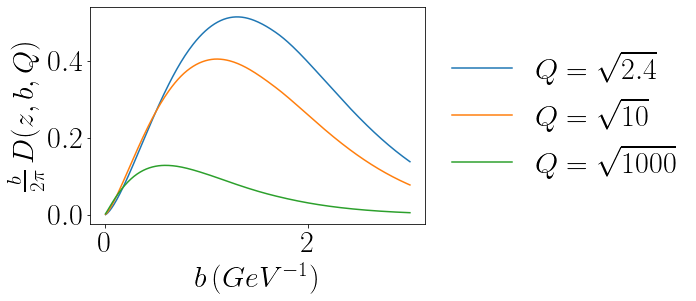

In [27]:
z = 0.4
b = np.linspace(1e-2,3,300)
Q = np.sqrt(2.4)
FF24 = [bb*TMDFF(z,Q,bb)[1]/2./np.pi for bb in b]
Q = np.sqrt(10.)
FF10 = [bb*TMDFF(z,Q,bb)[1]/2./np.pi for bb in b]
Q = np.sqrt(1e3)
FF1000 = [bb*TMDFF(z,Q,bb)[1]/2./np.pi for bb in b]
ax = py.subplot(111)
ax.plot(b,FF24,label = r"\rm $Q = \sqrt{2.4}$")
ax.plot(b,FF10,label = r"\rm $Q = \sqrt{10}$")
ax.plot(b,FF1000,label = r"\rm $Q = \sqrt{1000}$")
ax.set_ylabel(r"\rm $\frac{b}{2\pi}\, D(z,b,Q)$")
ax.set_xlabel(r"\rm $b\, (GeV^{-1})$")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon = False)
py.show()

# Check against Fig 8 in 1505.05589

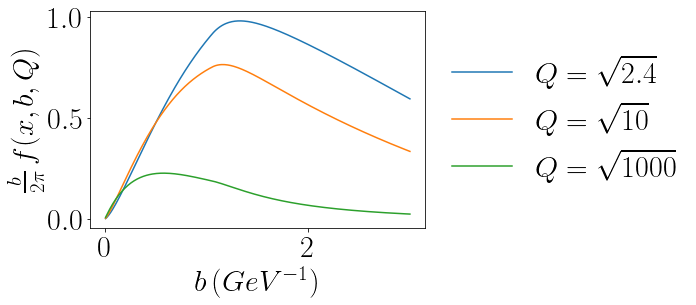

In [28]:
x = 0.1
b = np.linspace(1e-2,3,300)
Q = np.sqrt(2.4)
PDF24 = [bb*TMDPDF(x,Q,bb)[1]/2./np.pi for bb in b]
Q = np.sqrt(10.)
PDF10 = [bb*TMDPDF(x,Q,bb)[1]/2./np.pi for bb in b]
Q = np.sqrt(1e3)
PDF1000 = [bb*TMDPDF(x,Q,bb)[1]/2./np.pi for bb in b]
ax = py.subplot(111)
ax.plot(b,PDF24,label = r"\rm $Q = \sqrt{2.4}$")
ax.plot(b,PDF10,label = r"\rm $Q = \sqrt{10}$")
ax.plot(b,PDF1000,label = r"\rm $Q = \sqrt{1000}$")
ax.set_ylabel(r"\rm $\frac{b}{2\pi}\, f(x,b,Q)$")
ax.set_xlabel(r"\rm $b\, (GeV^{-1})$")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon = False)
py.show()